## Import labraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# - Classification

# K-Nearest Neighbors Classification

In [2]:
data = pd.read_excel("OSA_extreme_male.xlsx")
df_OSA_male = pd.DataFrame(data)

In [3]:
df_OSA_male.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0002,hombre,29.6,119,174,56,48,Severe,39.305060
1,P0004,hombre,19.7,78,168,39,42,Severe,27.636054
2,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
3,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
4,P0009,hombre,22.0,72,165,40,42,Severe,26.446281


In [4]:
features = ['Age','Cervical','BMI']

In [5]:
# Creating X and y
X = df_OSA_male[features]
y = df_OSA_male['OSA']

In [6]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [8]:
# Create KNN instance
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# Use the predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)

In [11]:
pred

array(['Healthy', 'Healthy', 'Severe', 'Severe', 'Severe', 'Healthy',
       'Severe', 'Healthy', 'Severe', 'Healthy', 'Severe', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Severe', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Severe', 'Severe', 'Severe', 'Severe',
       'Healthy', 'Severe', 'Healthy', 'Severe', 'Healthy', 'Healthy',
       'Severe', 'Severe', 'Healthy', 'Healthy', 'Severe', 'Healthy',
       'Severe', 'Healthy', 'Severe', 'Healthy', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Severe', 'Healthy', 'Severe', 'Severe', 'Severe',
       'Severe', 'Severe', 'Severe', 'Healthy', 'Severe', 'Healthy',
       'Severe', 'Healthy', 'Severe', 'Severe'], dtype=object)

## Evaluate the predictions

In [12]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Healthy       0.47      0.50      0.48        28
      Severe       0.59      0.56      0.57        36

    accuracy                           0.53        64
   macro avg       0.53      0.53      0.53        64
weighted avg       0.54      0.53      0.53        64



In [13]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 14
FP - False Positive 14
FN - False Negative 16
TP - True Positive 20
Accuracy Rate: 0.53125
Misclassification Rate: 0.46875


In [14]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

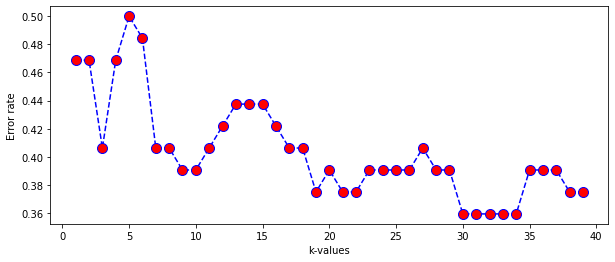

In [15]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('k-values')
plt.ylabel('Error rate')
plt.show()

In [16]:
params = {'n_neighbors':list(range(1, 40))}

knn = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 29}

In [17]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [18]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Healthy       0.56      0.50      0.53        28
      Severe       0.64      0.69      0.67        36

    accuracy                           0.61        64
   macro avg       0.60      0.60      0.60        64
weighted avg       0.61      0.61      0.61        64



In [19]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 14
FP - False Positive 14
FN - False Negative 11
TP - True Positive 25
Accuracy Rate: 0.609375
Misclassification Rate: 0.390625


# Radius Neighbors Classification

In [20]:
rn = RadiusNeighborsClassifier(radius=5, weights='distance')
rn.fit(X_train, y_train)
pred = rn.predict(X_test)

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Healthy       0.55      0.57      0.56        28
      Severe       0.66      0.64      0.65        36

    accuracy                           0.61        64
   macro avg       0.60      0.61      0.60        64
weighted avg       0.61      0.61      0.61        64



In [22]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 16
FP - False Positive 12
FN - False Negative 13
TP - True Positive 23
Accuracy Rate: 0.609375
Misclassification Rate: 0.390625


In [23]:
error_rate = []
for i in range(5,40):
    rn = RadiusNeighborsClassifier(radius=i)
    rn.fit(X_train, y_train)
    pred_i = rn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

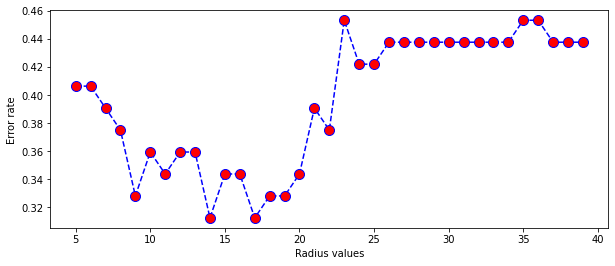

In [24]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(5,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Radius values')
plt.ylabel('Error rate')
plt.show()

In [25]:
# Retrain model using optimal radius
rn = RadiusNeighborsClassifier(radius=14.5, weights='distance')
rn.fit(X_train, y_train)
pred = rn.predict(X_test)

In [26]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 16
FP - False Positive 12
FN - False Negative 11
TP - True Positive 25
Accuracy Rate: 0.640625
Misclassification Rate: 0.359375


# - Regression

# KNN Regression

In [27]:
features = ['Age','Cervical','BMI']

In [28]:
# Creating X and y
X = df_OSA_male[features]
y = df_OSA_male['IAH']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Create KNN instance
knn = KNeighborsRegressor(n_neighbors=1)

In [32]:
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

## Evaluate the predictions

### Test set

In [33]:
pred_test_knn = knn.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_knn))) 
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_knn))
print('R-Squared:', r2_score(y_test, pred_test_knn))

RMSE: 12.039901110474288
MAE: 10.1109375
R-Squared: -0.9136118537051916


In [34]:
pred_test_knn

array([13.3,  3.6, 13.5, 10. , 17.2,  4.8, 11. ,  7.1, 22.5,  7.4, 13.3,
        3.5,  7.8, 26. ,  2.1, 27.9,  0. ,  2.5,  6. ,  1.4, 22.6, 27.6,
       11.3, 13.2,  2. , 28.3,  0. , 26.4,  7.1,  4.6, 27. , 20.3,  0. ,
       10. ,  0. ,  4.8, 15.9,  4.6, 21. ,  0. , 13.2, 13.7, 21.7, 15.9,
       29.9,  2. , 22. , 20.2,  8.4, 10.8,  8.7, 11. , 21.7, 21.9, 11. ,
       21.4,  3. ,  0. ,  3. ,  1.5, 10.2, 11.3,  8.7, 10.7])

In [35]:
rmse_val = [] # to store RMSE values for different k

for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) # fit the model
    pred = model.predict(X_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) # calculate RMSE
    rmse_val.append(error) # store RMSE values
    print('RMSE value for k =' , K , 'is:', error)

RMSE value for k = 1 is: 12.039901110474288
RMSE value for k = 2 is: 10.534267001077959
RMSE value for k = 3 is: 10.22050210089722
RMSE value for k = 4 is: 9.29595583691505
RMSE value for k = 5 is: 9.024357317837099
RMSE value for k = 6 is: 8.82103088859233
RMSE value for k = 7 is: 8.893018501117856
RMSE value for k = 8 is: 8.728888314724706
RMSE value for k = 9 is: 8.676402450943636
RMSE value for k = 10 is: 8.493817880523457
RMSE value for k = 11 is: 8.430584172136061
RMSE value for k = 12 is: 8.346292267711187
RMSE value for k = 13 is: 8.402288625250375
RMSE value for k = 14 is: 8.387330342120617
RMSE value for k = 15 is: 8.378092505324693
RMSE value for k = 16 is: 8.395180654848296
RMSE value for k = 17 is: 8.339885976252061
RMSE value for k = 18 is: 8.364457675131966
RMSE value for k = 19 is: 8.392785952366697
RMSE value for k = 20 is: 8.367539984405512
RMSE value for k = 21 is: 8.27309698456306
RMSE value for k = 22 is: 8.246812537734886
RMSE value for k = 23 is: 8.19516421826141

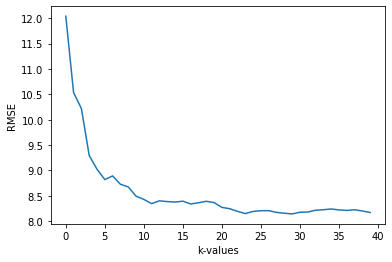

In [36]:
# Plotting the RMSE values against k values
curve = pd.DataFrame(rmse_val) # Elbow curve 
curve.plot(legend = False)
plt.xlabel('k-values')
plt.ylabel('RMSE')
plt.show()

## Implementing GridsearchCV

In [37]:
params = {'n_neighbors':list(range(1, 40))}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 19}

In [38]:
# Retrain model using optimal k-value
knn = KNeighborsRegressor(n_neighbors=29)
knn.fit(X_train, y_train)
pred_test_knn = knn.predict(X_test)

In [39]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_knn))) 
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_knn))
print('R-Squared:', r2_score(y_test, pred_test_knn))

RMSE: 8.15824006421135
MAE: 6.7060344827586205
R-Squared: 0.1213802238943329


# Radius Neighbors Regression

In [40]:
rn = RadiusNeighborsRegressor(radius=5, weights='distance')
rn.fit(X_train, y_train)
pred = rn.predict(X_test)
pred_test_knn = knn.predict(X_test)

In [41]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))) 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('R-Squared:', r2_score(y_test, pred))

RMSE: 8.425313139808338
MAE: 7.014366922892688
R-Squared: 0.06291256440927362
